# Heart Disease Classification Problem

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.target.value_counts(normalize=True) * 100

1    54.455446
0    45.544554
Name: target, dtype: float64

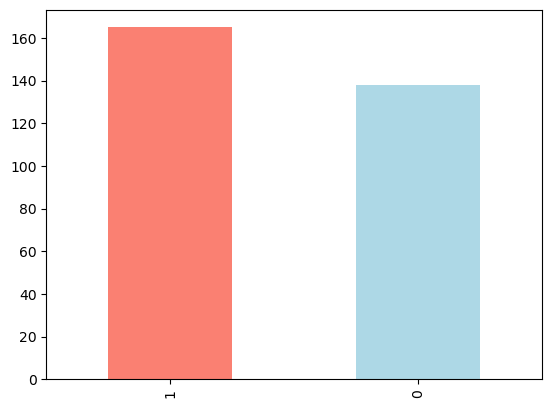

In [7]:
df.target.value_counts().plot(kind="bar",color=["salmon", "lightblue"]);

In [6]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


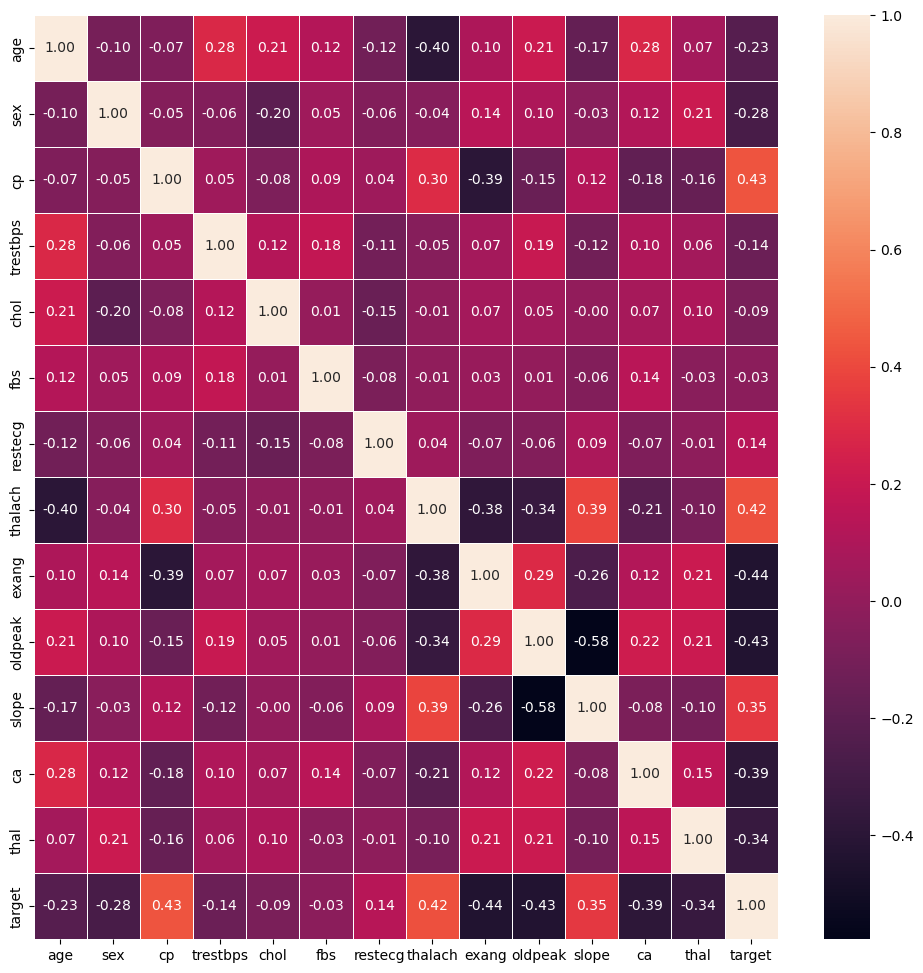

In [7]:

plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            );

In [8]:
x = df.drop("target", axis= 1)
y = df.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
models = {"Random Forest":RandomForestClassifier(),"Logistic Regression":LogisticRegression()}

In [10]:
def fit_and_score(models,x_train, x_test, y_train, y_test):
    models_scores = {}
    for name,model in models.items():
        model.fit(x_train, y_train)
        models_scores[name] = model.score(x_test, y_test)
    return models_scores
models_scores = fit_and_score(models,x_train, x_test, y_train, y_test)
models_scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Random Forest': 0.819672131147541, 'Logistic Regression': 0.8688524590163934}

<AxesSubplot:>

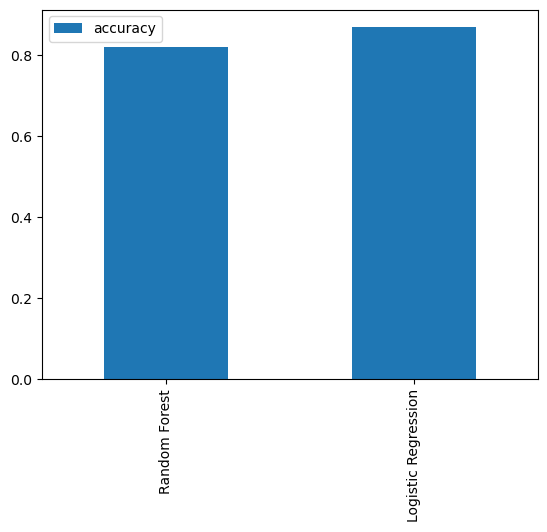

In [11]:
models_df = pd.DataFrame(models_scores, index=["accuracy"])
models_df.T.plot(kind="bar")

In [12]:
lr_grid = {"C":np.logspace(-4,4,20),"solver":["liblinear"]}
lr_gs = GridSearchCV(LogisticRegression(),lr_grid,cv = 5,verbose=True)
lr_gs.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [13]:
lr_gs.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [14]:
lr_gs.score(x_test, y_test)

0.8360655737704918

In [15]:
models_scores

{'Random Forest': 0.819672131147541, 'Logistic Regression': 0.8688524590163934}

In [16]:
model = models["Random Forest"]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


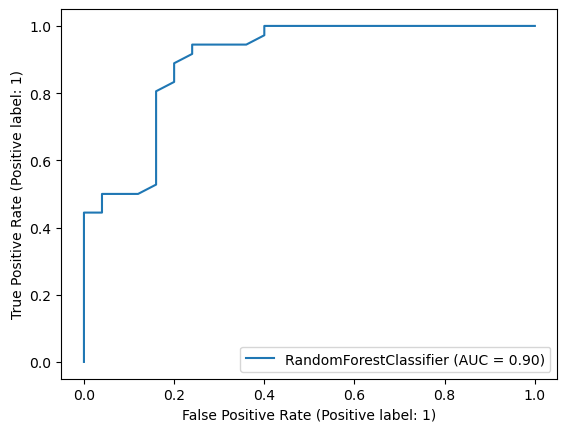

In [18]:
from sklearn.metrics import plot_roc_curve,confusion_matrix

# Plot ROC curve and calculate AUC metric
plot_roc_curve(model, x_test, y_test)
plt.savefig(fname="png.png")

In [23]:
y_preds = model.predict(x_test)
y_preds

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [27]:
confusion_matrix(y_test, y_preds)

array([[20,  5],
       [ 6, 30]], dtype=int64)

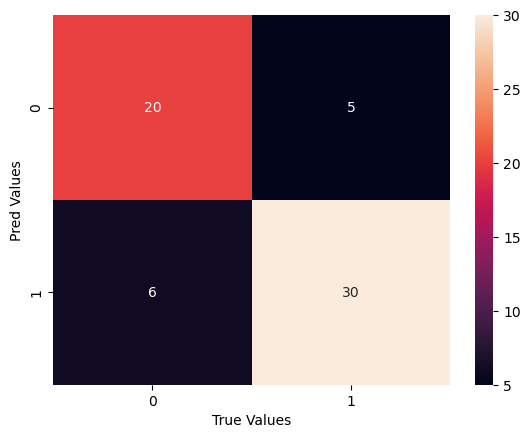

In [32]:
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                annot = True,
                )
plt.xlabel("True Values")
plt.ylabel("Pred Values")
fig.savefig("Confusion Matrix")

In [36]:
from sklearn.model_selection import cross_val_score

cv_acc = np.mean(cross_val_score(model,
                         x,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy"))
cv_acc

0.8182513661202186

In [38]:
cv_pre = np.mean(cross_val_score(model,
                         x,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="precision"))
cv_pre

0.8284248053288301

In [41]:
cv_recall = np.mean(cross_val_score(model,
                         x,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="recall"))
cv_recall

0.8727272727272727

In [43]:
cv_f1 = np.mean(cross_val_score(model,
                         x,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="f1"))
cv_f1

0.8442794468492067

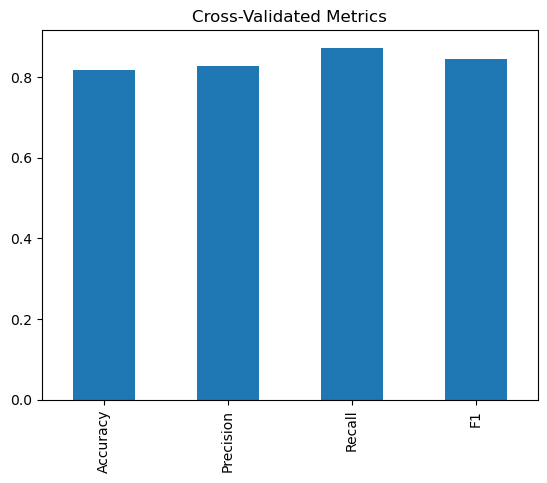

In [55]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_pre,
                            "Recall": cv_recall,
                            "F1": cv_f1}, index=[0])
cv_metrics.T.plot(kind="bar",title="Cross-Validated Metrics", legend=False);
plt.savefig("Cross-Validated Metrics")